<a href="https://colab.research.google.com/github/OmarAhmedElwekeil/Aswan-Solar-notebook/blob/main/Aswan_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/AswanData_weatherdata.csv')
df.head(10)

,Unnamed: 0,Date,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV)
0,0,4/1/2022,87.9,31.3,13.4,5.7,29.2,19.010857
1,2,4/3/2022,90.2,34.0,14.2,6.6,29.1,16.885714
2,3,4/4/2022,93.2,31.4,11.8,8.8,29.1,19.627429
3,4,4/5/2022,92.5,24.9,9.4,8.0,29.1,18.929429
4,5,4/6/2022,91.2,18.9,7.8,9.4,29.2,18.934000
5,6,4/7/2022,94.0,26.3,9.4,11.0,29.2,17.435143
6,7,4/8/2022,92.3,24.9,10.0,6.5,29.1,16.717714
7,8,4/9/2022,92.5,30.4,11.9,8.9,29.1,17.146286
8,9,4/10/2022,90.6,32.0,13.3,8.5,29.1,15.938857
9,10,4/11/2022,89.9,30.4,12.3,7.9,29.1,16.939143


In [ ]:
df.shape

(398, 8)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
AvgTemperture,0
AverageDew(point via humidity),0
Humidity,0
Wind,0
Pressure,0
Solar(PV),0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      398 non-null    int64  
 1   Date                            398 non-null    object 
 2   AvgTemperture                   398 non-null    float64
 3   AverageDew(point via humidity)  398 non-null    float64
 4   Humidity                        398 non-null    float64
 5   Wind                            398 non-null    float64
 6   Pressure                        398 non-null    float64
 7   Solar(PV)                       398 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 25.0+ KB


In [ ]:
df.describe()

,Unnamed: 0,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV)
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,211.439698,81.846482,36.754020,22.968090,10.146734,29.183040,24.375258
std,122.655628,13.613097,8.906835,9.756598,2.509152,0.140241,7.507561
min,0.000000,51.100000,15.300000,7.400000,4.400000,28.900000,8.581429
25%,102.250000,70.850000,29.625000,15.625000,8.300000,29.100000,17.687714
50%,215.500000,85.050000,37.250000,20.500000,10.100000,29.200000,23.476000
75%,315.750000,93.400000,44.000000,28.975000,12.000000,29.300000,31.729571
max,421.000000,102.700000,63.900000,47.700000,17.100000,29.600000,40.038857


In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df

,Date,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV)
0,4/1/2022,87.9,31.3,13.4,5.7,29.2,19.010857
1,4/3/2022,90.2,34.0,14.2,6.6,29.1,16.885714
2,4/4/2022,93.2,31.4,11.8,8.8,29.1,19.627429
3,4/5/2022,92.5,24.9,9.4,8.0,29.1,18.929429
4,4/6/2022,91.2,18.9,7.8,9.4,29.2,18.934000
...,...,...,...,...,...,...,...
393,4/26/2021,78.3,40.1,26.8,7.3,29.2,34.996286
394,4/27/2021,75.2,32.3,17.6,6.6,29.2,37.427429
395,4/28/2021,86.6,37.0,21.4,16.9,29.0,33.623429
396,4/29/2021,86.1,35.1,17.1,14.5,29.1,34.010286


In [ ]:
from datetime import datetime

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
today_timestamp = pd.to_datetime(datetime.now().date())
df['time in days'] = (today_timestamp - df['Date']).dt.days
display(df.head())

,Date,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV),time in days
0,2022-04-01,87.9,31.3,13.4,5.7,29.2,19.010857,1333
1,2022-04-03,90.2,34.0,14.2,6.6,29.1,16.885714,1331
2,2022-04-04,93.2,31.4,11.8,8.8,29.1,19.627429,1330
3,2022-04-05,92.5,24.9,9.4,8.0,29.1,18.929429,1329
4,2022-04-06,91.2,18.9,7.8,9.4,29.2,18.934000,1328


In [ ]:
df.drop('Date', axis = 1, inplace = True)
df.head(10)

,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV),time in days
0,87.9,31.3,13.4,5.7,29.2,19.010857,1333
1,90.2,34.0,14.2,6.6,29.1,16.885714,1331
2,93.2,31.4,11.8,8.8,29.1,19.627429,1330
3,92.5,24.9,9.4,8.0,29.1,18.929429,1329
4,91.2,18.9,7.8,9.4,29.2,18.934000,1328
5,94.0,26.3,9.4,11.0,29.2,17.435143,1327
6,92.3,24.9,10.0,6.5,29.1,16.717714,1326
7,92.5,30.4,11.9,8.9,29.1,17.146286,1325
8,90.6,32.0,13.3,8.5,29.1,15.938857,1324
9,89.9,30.4,12.3,7.9,29.1,16.939143,1323


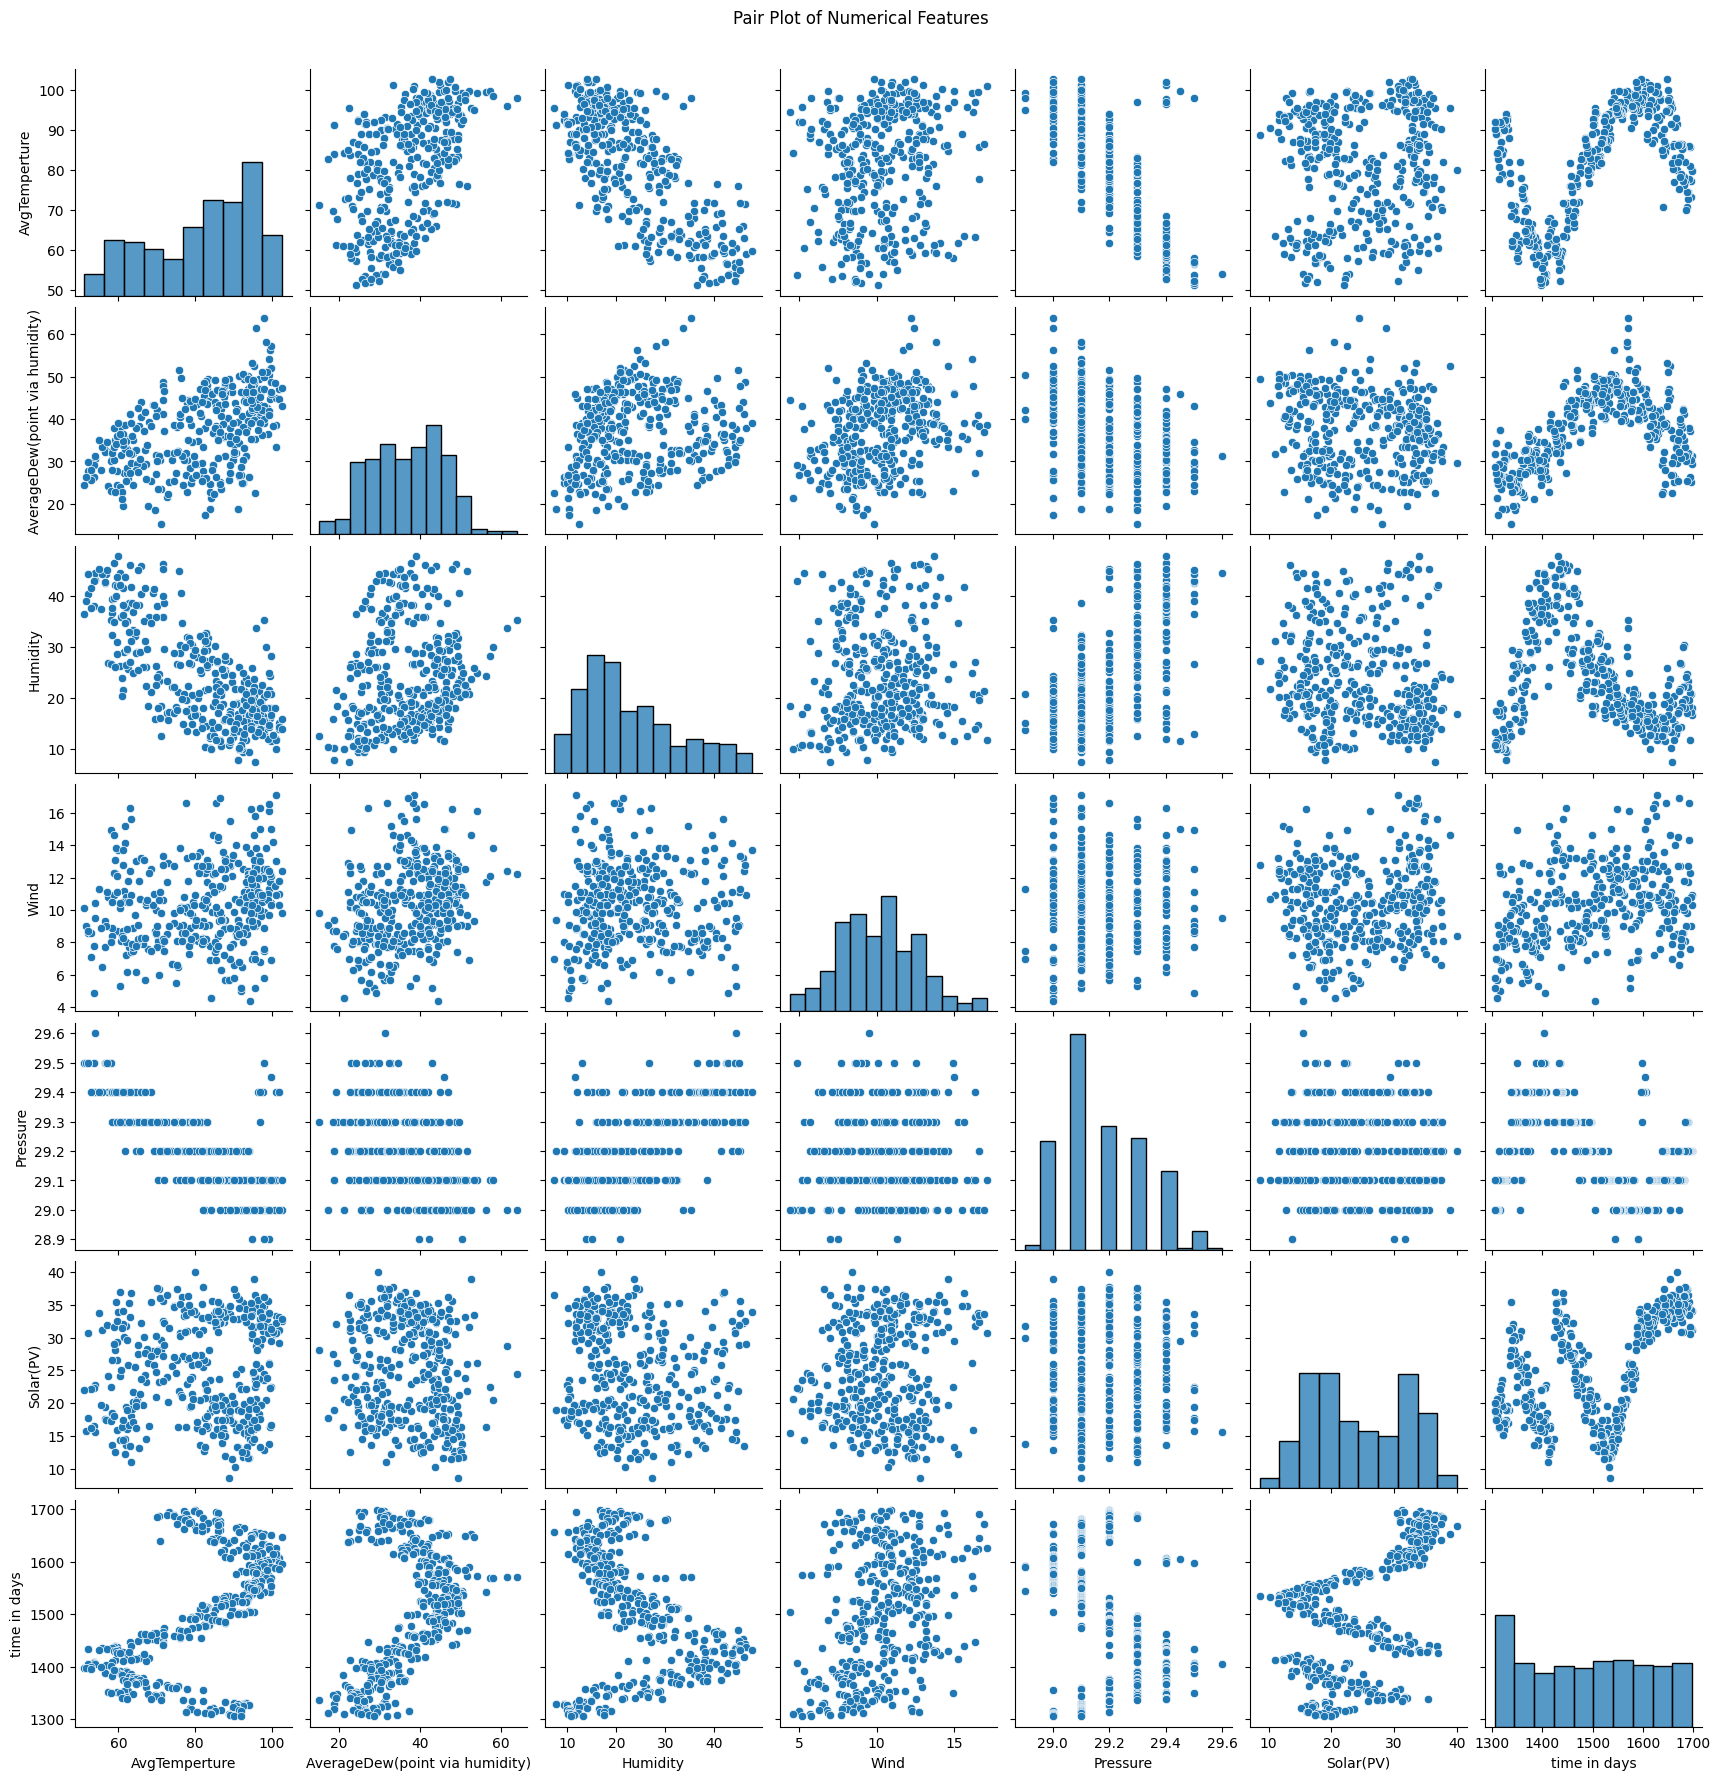

In [ ]:
sns.pairplot(df)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

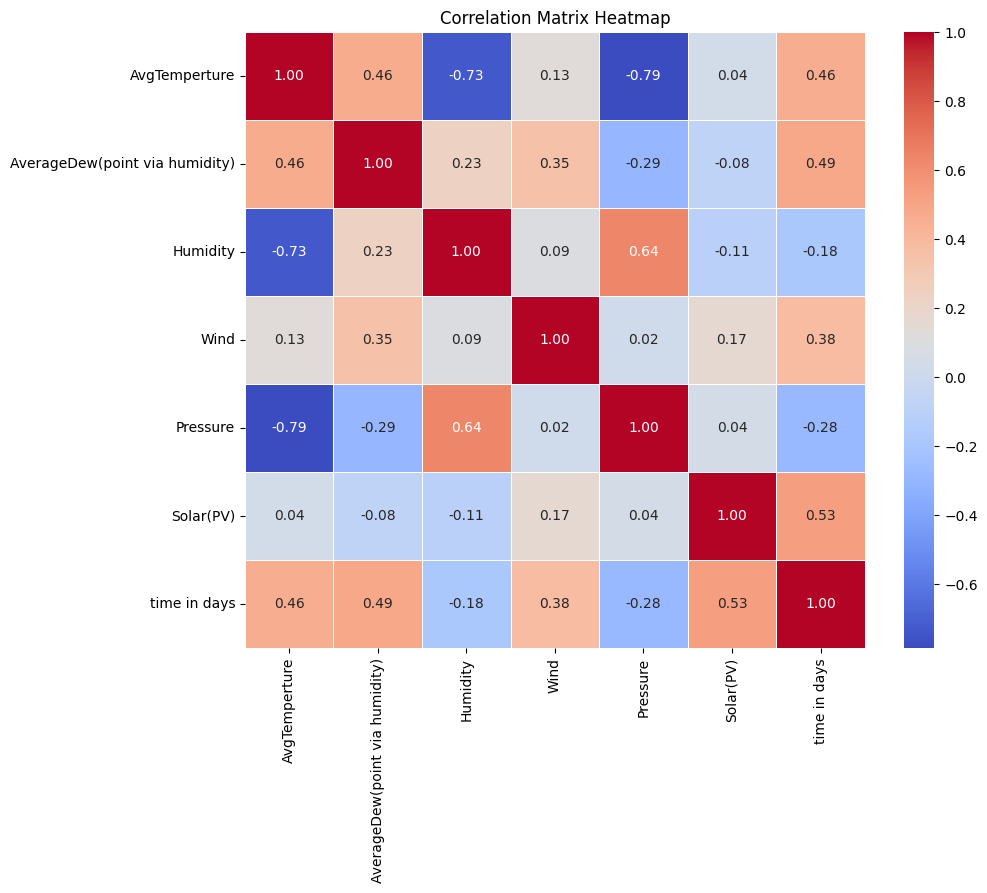

In [ ]:
plt.figure(figsize=(10, 8)) # Adjust figure size for better readability
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()